# Código de la PRAC2 de Tipología y Ciclo de Vida de los Datos
## Juan Alonso Franco Blanco y Juan Prieto Pena

### Paquetes necesarios

Primero, importaremos los paquetes que se van a necesitar a lo largo de este notebook

In [ ]:
import pandas as pd #Paquete de manipulación de datos.
import matplotlib.pyplot as plt #Paquete de visualización de datos.
import seaborn as sns #Paquete de visualización de datos. Más visual que pyplot.
import numpy as np #Paquete de computación científica de Python.
from scipy import stats #Paquete de cálculo estadístico de Python.
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


### Carga de datos

Realizamos la carga del fichero csv con los datos

In [ ]:
df_wine=pd.read_csv('winequality-red.csv')

Comprobación de que la carga es correcta:

In [ ]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Estudio preliminar de los datos

El siguiente código nos proporcionará el tamaño del dataset (filas, columnas):

In [ ]:
print('El tamaño del dataset es: ')
df_wine.shape

El tamaño del dataset es: 


(1599, 12)

Con este código podremos ver el tipo de dato de cada uno de los atributos del dataset:

In [ ]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Generalmente, el número 0 puede usarse para marcar valores nulos, comprobaremos si esto es así en este caso:

In [ ]:
df_wine.eq(0).any()

fixed acidity           False
volatile acidity        False
citric acid              True
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

El atributo de contenido de ácido cítrico presenta valores nulos, comprobemos cuántos hay:

In [ ]:
df_wine[df_wine['citric acid']==0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.0,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.0,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4,7.4,0.700,0.0,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.0,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
7,7.3,0.650,0.0,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6.5,0.900,0.0,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6
1461,6.2,0.785,0.0,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0,4
1550,7.1,0.680,0.0,2.3,0.087,17.0,26.0,0.99783,3.45,0.53,9.5,5
1551,7.1,0.670,0.0,2.3,0.083,18.0,27.0,0.99768,3.44,0.54,9.4,5


Dado que los valores de ácido cítrico suelen ser bajos en los vinos, suponemos que los valores nulos de esta propiedad, especialmente en vinos tintos, es posible. Por tanto no procederemos a eliminar estas entradas.

A continuación, comprobaremos los valores nulos (null o NaN) del dataset:

In [ ]:
print(f'El dataset contiene {df_wine.shape[0]} entradas.\nEl dataset contiene los siguientes valores nulos:')
df_wine.isnull().sum()

El dataset contiene 1599 entradas.
El dataset contiene los siguientes valores nulos:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Usando el siguiente código, podemos ver un resumen de los datos, con sus valores medios, desviaciones típicas, valores mínimos y máximos y valores de los cuartiles.

In [ ]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Tratamiento de valores extremos

Visualización de outliers en los datos mediante gráficos de cajas (boxplot):

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.6/dist-packa

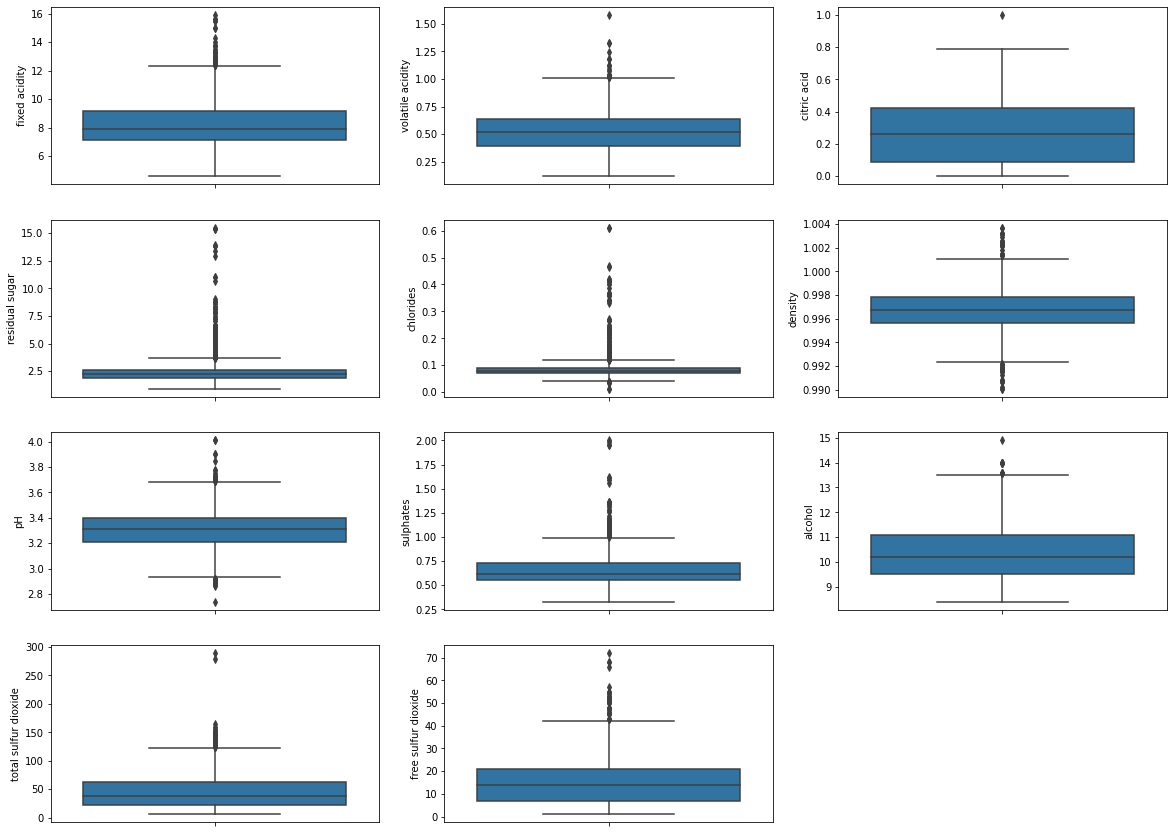

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(20,15))
sns.boxplot(y='fixed acidity', data=df_wine,orient="h", ax=ax[0,0])
sns.boxplot(y='volatile acidity', data=df_wine,orient="h", ax=ax[0,1])
sns.boxplot(y='citric acid', data=df_wine,orient="h", ax=ax[0,2])
sns.boxplot(y='residual sugar', data=df_wine,orient="h", ax=ax[1,0])
sns.boxplot(y='chlorides', data=df_wine,orient="h", ax=ax[1,1])
sns.boxplot(y='density', data=df_wine,orient="h", ax=ax[1,2])
sns.boxplot(y='pH', data=df_wine,orient="h", ax=ax[2,0])
sns.boxplot(y='sulphates', data=df_wine,orient="h", ax=ax[2,1])
sns.boxplot(y='alcohol', data=df_wine,orient="h", ax=ax[2,2])
sns.boxplot(y='total sulfur dioxide',orient="h", data=df_wine, ax=ax[3,0])
sns.boxplot(y='free sulfur dioxide',orient="h", data=df_wine, ax=ax[3,1])
ax[3,2].set_visible(False)

plt.show()

Contaje del número de outliers en los diagramas de cajas mediante el rango intercuartil (IQR):

In [ ]:
df_wine_iqr=df_wine.drop(['quality'], axis=1)

Q_1 = df_wine_iqr.quantile(0.25)
Q_3 = df_wine_iqr.quantile(0.75)
IQR = Q_3 - Q_1

mask = (df_wine_iqr < (Q_1 - 1.5 * IQR)) | (df_wine_iqr > (Q_3 + 1.5 * IQR))

In [ ]:
print('El número de outliers para cada una de las variables es:')
print(mask.sum())

El número de outliers para cada una de las variables es:
fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
dtype: int64


Potencialmente existen 573 outliers en el conjunto de datos empleando el método del rango intercuartil, casi un 30% de los datos, si todos los outliers fuesen entradas diferentes. 

Examinaremos otro modo de eliminar los outliers, empleando el z-score. El z-score nos dice cuantas desviaciones típicas un elemento está alejado del valor medio. Si eliminamos todos aquellos puntos con z-scores superiores a 3, estaremos eliminando los outliers.

In [ ]:
df_wine=df_wine[(np.abs(stats.zscore(df_wine)) < 3).all(axis=1)]
df_wine.reset_index(drop=True,inplace=True)
print('Nuevo número de entradas en el dataset: ',df_wine.shape)

Nuevo número de entradas en el dataset:  (1451, 12)


### Comprobación de la normalidad

Diagramas de cuantil-cuantil, comparando las distribuciones de variables de entrada con una distribución normal:

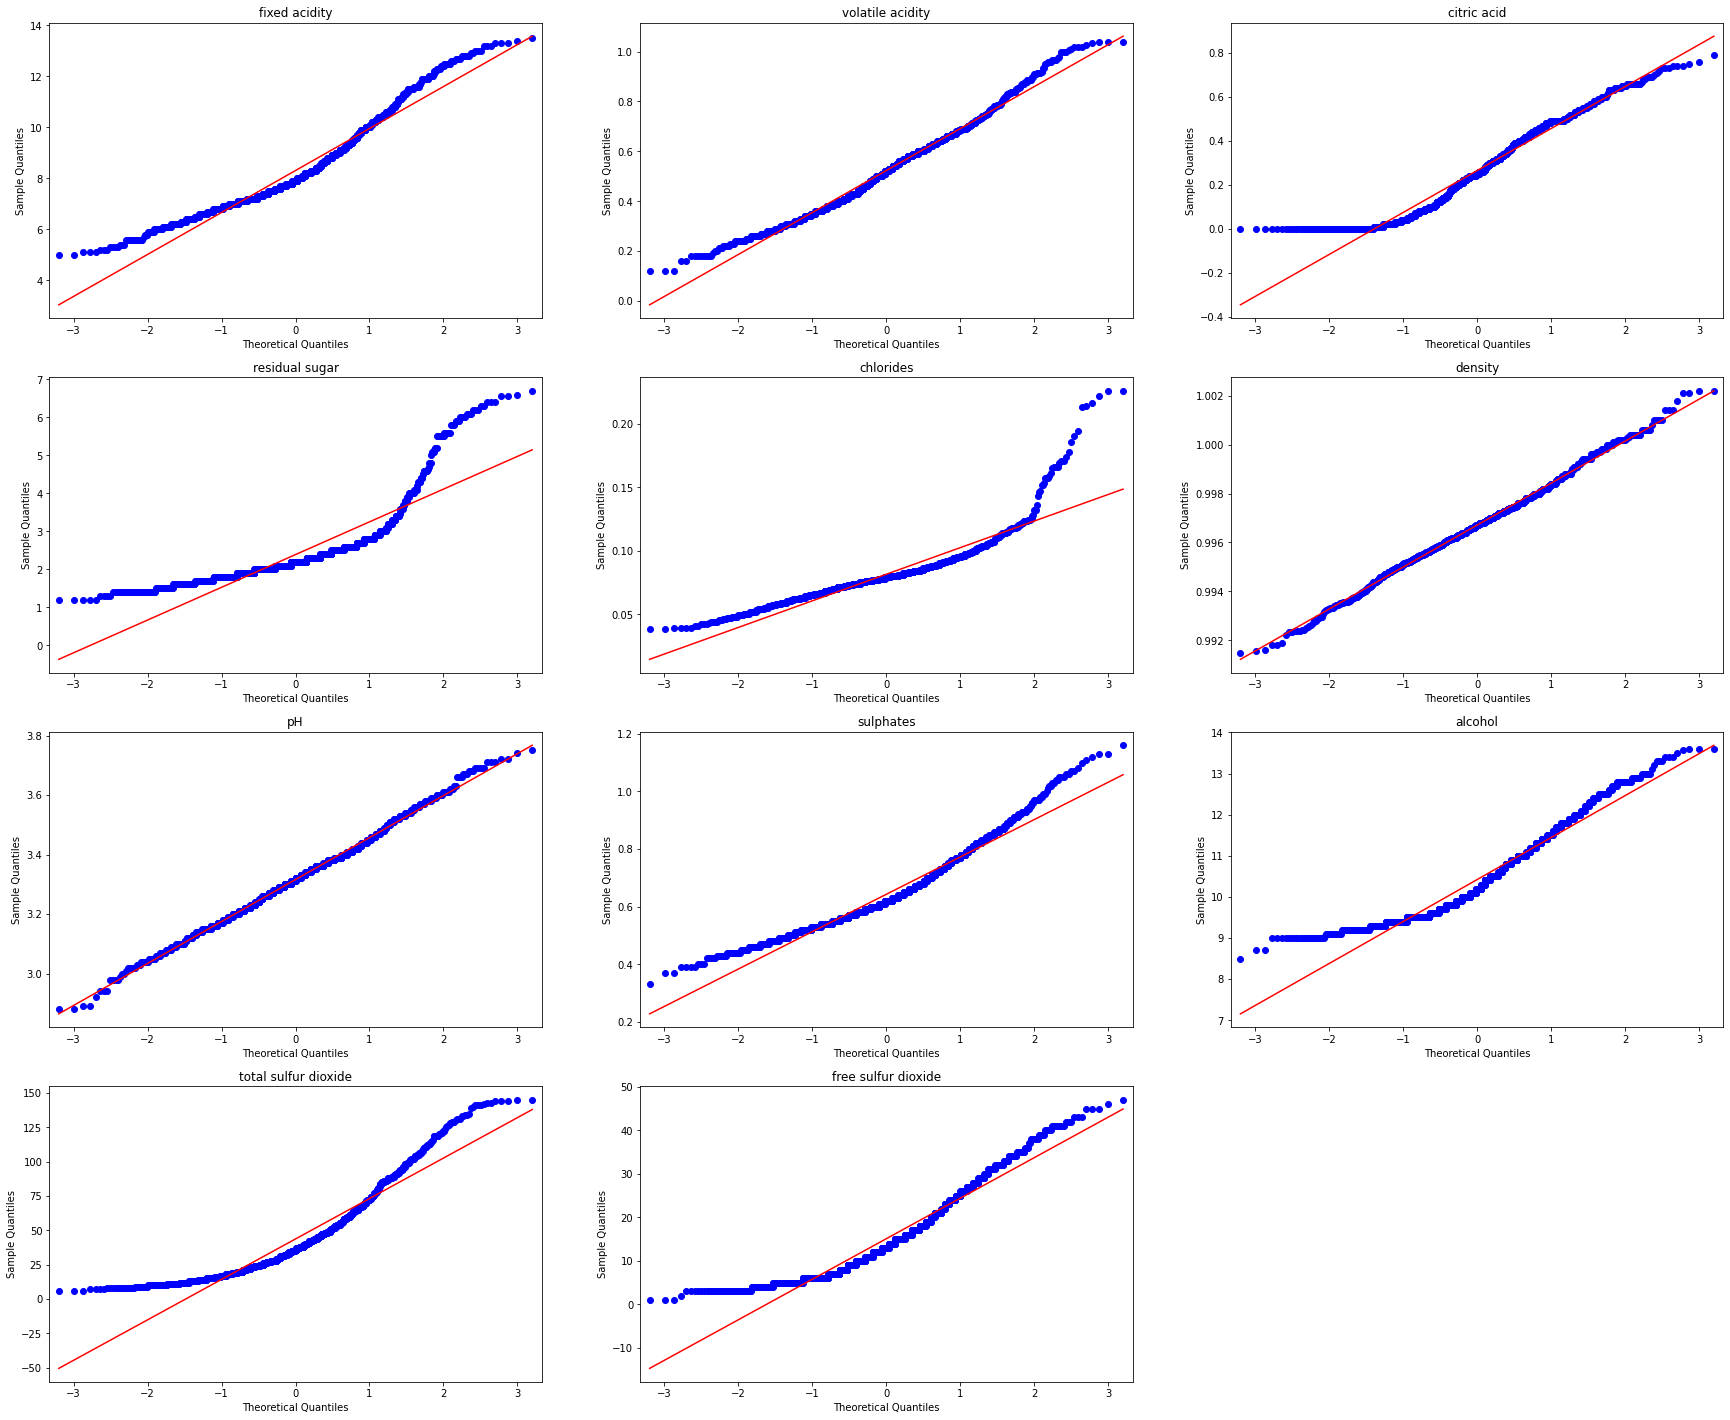

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(30,25))
sm.qqplot(df_wine['fixed acidity'],line='s', ax=ax[0,0])
ax[0,0].set_title('fixed acidity')
sm.qqplot(df_wine['volatile acidity'],line='s', ax=ax[0,1])
ax[0,1].set_title('volatile acidity')
sm.qqplot(df_wine['citric acid'],line='s', ax=ax[0,2])
ax[0,2].set_title('citric acid')
sm.qqplot(df_wine['residual sugar'],line='s', ax=ax[1,0])
ax[1,0].set_title('residual sugar')
sm.qqplot(df_wine['chlorides'],line='s', ax=ax[1,1])
ax[1,1].set_title('chlorides')
sm.qqplot(df_wine['density'],line='s', ax=ax[1,2])
ax[1,2].set_title('density')
sm.qqplot(df_wine['pH'],line='s', ax=ax[2,0])
ax[2,0].set_title('pH')
sm.qqplot(df_wine['sulphates'],line='s', ax=ax[2,1])
ax[2,1].set_title('sulphates')
sm.qqplot(df_wine['alcohol'],line='s', ax=ax[2,2])
ax[2,2].set_title('alcohol')
sm.qqplot(df_wine['total sulfur dioxide'],line='s', ax=ax[3,0])
ax[3,0].set_title('total sulfur dioxide')
sm.qqplot(df_wine['free sulfur dioxide'],line='s', ax=ax[3,1])
ax[3,1].set_title('free sulfur dioxide')
ax[3,2].set_visible(False)

plt.show()

Para comprobar si las diferentes columnas siguen una distribución normal, realizaremos los test de Kolmogorov-Smirnov y de Shapiro-Wilk sobre ellas.

In [ ]:
for col in df_wine.columns:
    print("\nTest de Shapiro-Wilk para la columna",col)
    print(stats.shapiro(df_wine[col]))
    print("Test de Kolmogorov-Smirnov para la columna",col)
    print(stats.kstest(df_wine[col], 'norm'))
    


Test de Shapiro-Wilk para la columna fixed acidity
(0.9462423324584961, 1.38919314177183e-22)
Test de Kolmogorov-Smirnov para la columna fixed acidity
KstestResult(statistic=0.9999997133484281, pvalue=0.0)

Test de Shapiro-Wilk para la columna volatile acidity
(0.986117422580719, 1.4341020038166619e-10)
Test de Kolmogorov-Smirnov para la columna volatile acidity
KstestResult(statistic=0.5748486552953148, pvalue=0.0)

Test de Shapiro-Wilk para la columna citric acid
(0.953080415725708, 3.752339251165586e-21)
Test de Kolmogorov-Smirnov para la columna citric acid
KstestResult(statistic=0.5, pvalue=0.0)

Test de Shapiro-Wilk para la columna residual sugar
(0.7502002716064453, 3.050626756835127e-42)
Test de Kolmogorov-Smirnov para la columna residual sugar
KstestResult(statistic=0.9130407218827004, pvalue=0.0)

Test de Shapiro-Wilk para la columna chlorides
(0.8417074084281921, 9.856487128263449e-36)
Test de Kolmogorov-Smirnov para la columna chlorides
KstestResult(statistic=0.51515615898

Podemos ver que los test de Shapiro-Wilk y Kolmogorov-Smirnov para todas las columnas del dataset rechazan la hipótesis de que los datos siguen distribuciones normales.

### Transformación de variables

#### Variables de entrada

In [ ]:
df_wine_norm=pd.DataFrame()
lambda_transf=[]

for col in df_wine.columns[:-1]:
    transf, lam_par = stats.yeojohnson(df_wine[col])
    lambda_transf.append(lam_par)
    df_wine_norm[col]=transf

df_wine_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.892415,0.482834,-0.000000,0.435227,0.041431,2.943864,3.799481,0.052351,1.350593,0.240859,0.271944
1,0.898041,0.564416,-0.000000,0.455284,0.046209,4.076388,4.566264,0.052351,1.293276,0.257455,0.271950
2,0.898041,0.511286,0.038977,0.448254,0.045077,3.351725,4.319256,0.052351,1.304741,0.253764,0.271950
3,0.931072,0.236165,0.414603,0.435227,0.041169,3.523259,4.439553,0.052351,1.285528,0.243990,0.271950
4,0.892415,0.482834,-0.000000,0.435227,0.041431,2.943864,3.799481,0.052351,1.350593,0.240859,0.271944


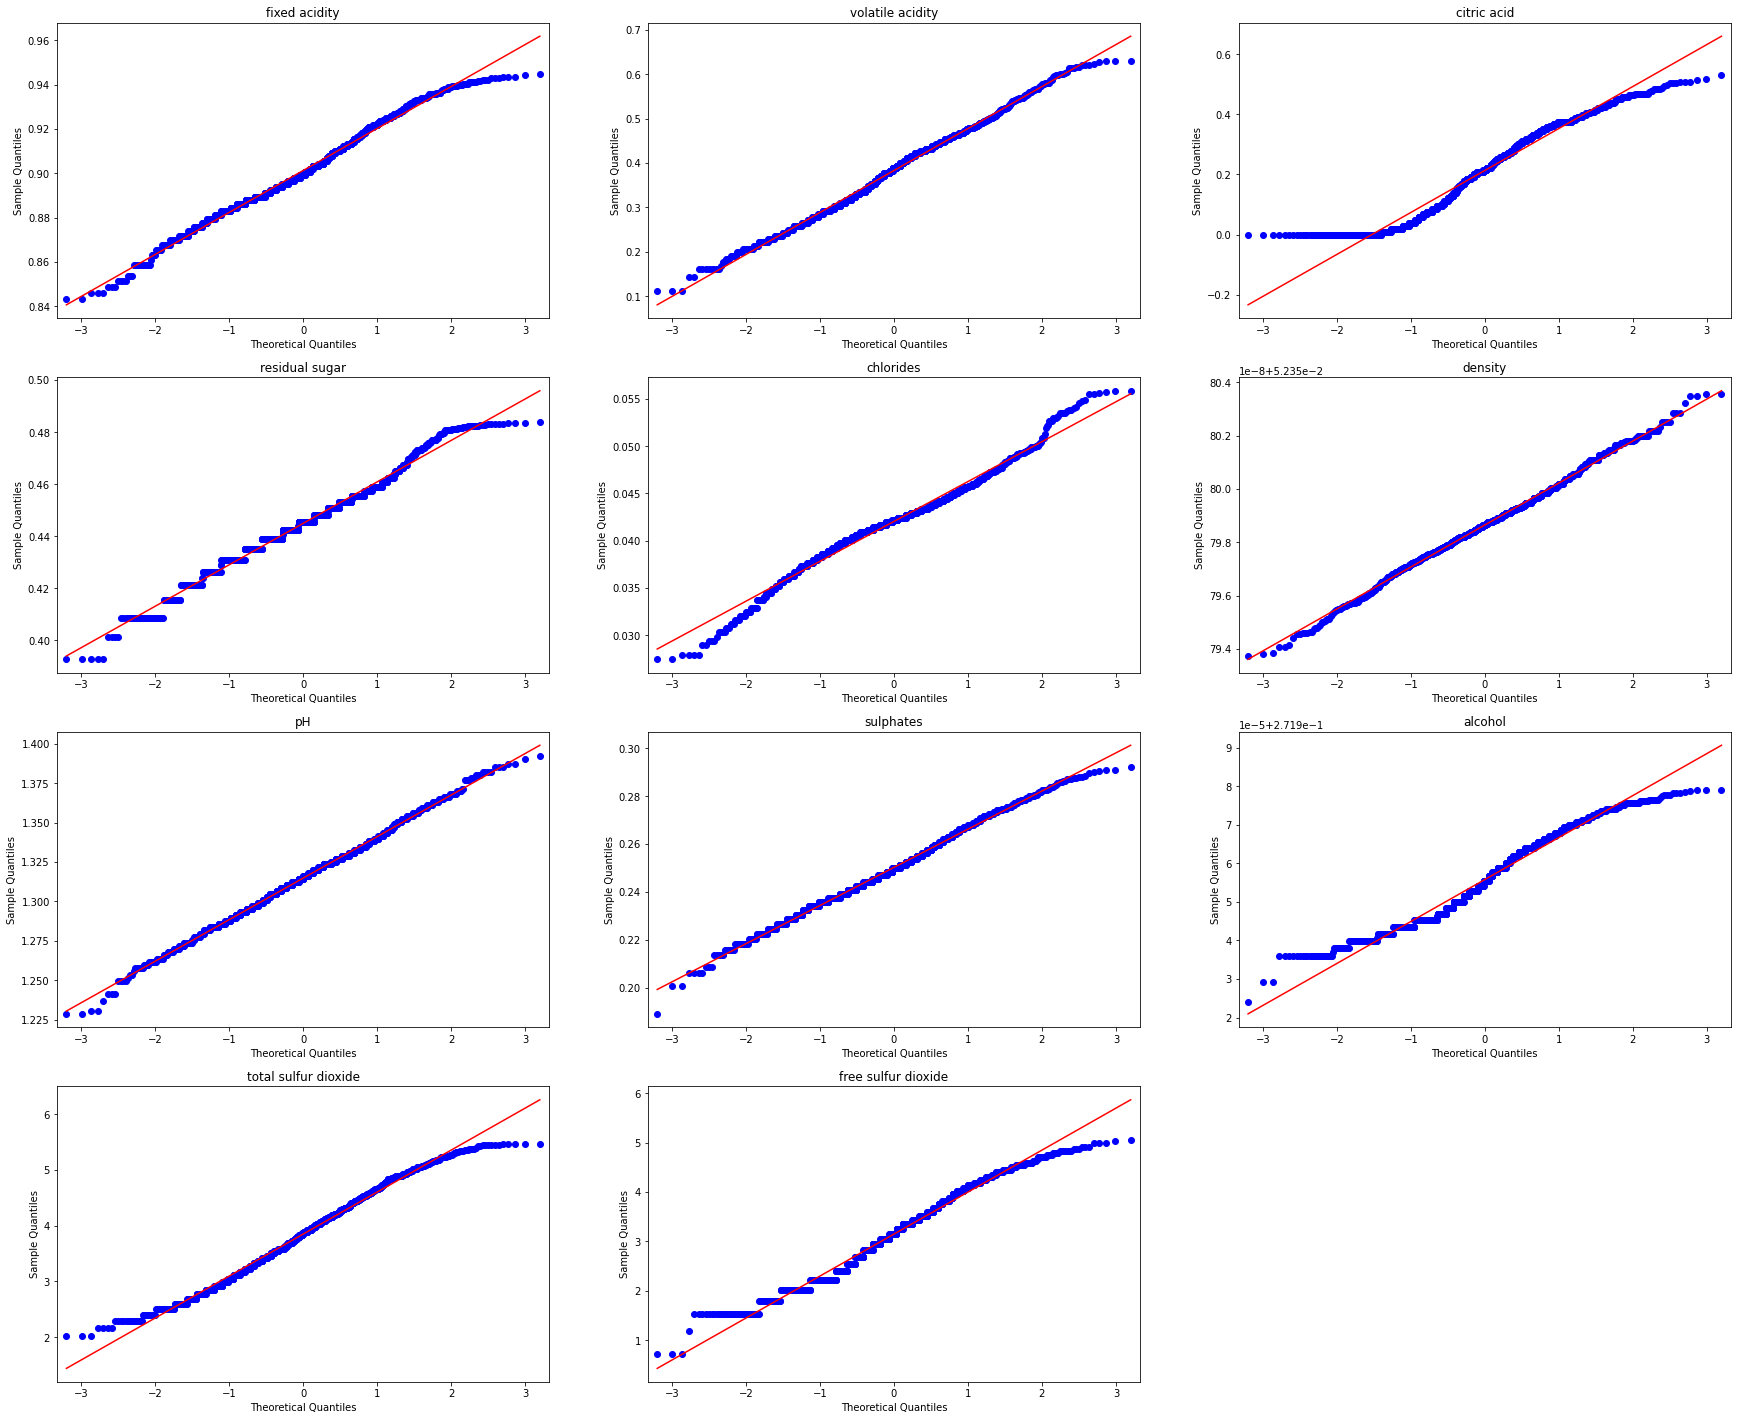

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(30,25))
sm.qqplot(df_wine_norm['fixed acidity'],line='s', ax=ax[0,0])
ax[0,0].set_title('fixed acidity')
sm.qqplot(df_wine_norm['volatile acidity'],line='s', ax=ax[0,1])
ax[0,1].set_title('volatile acidity')
sm.qqplot(df_wine_norm['citric acid'],line='s', ax=ax[0,2])
ax[0,2].set_title('citric acid')
sm.qqplot(df_wine_norm['residual sugar'],line='s', ax=ax[1,0])
ax[1,0].set_title('residual sugar')
sm.qqplot(df_wine_norm['chlorides'],line='s', ax=ax[1,1])
ax[1,1].set_title('chlorides')
sm.qqplot(df_wine_norm['density'],line='s', ax=ax[1,2])
ax[1,2].set_title('density')
sm.qqplot(df_wine_norm['pH'],line='s', ax=ax[2,0])
ax[2,0].set_title('pH')
sm.qqplot(df_wine_norm['sulphates'],line='s', ax=ax[2,1])
ax[2,1].set_title('sulphates')
sm.qqplot(df_wine_norm['alcohol'],line='s', ax=ax[2,2])
ax[2,2].set_title('alcohol')
sm.qqplot(df_wine_norm['total sulfur dioxide'],line='s', ax=ax[3,0])
ax[3,0].set_title('total sulfur dioxide')
sm.qqplot(df_wine_norm['free sulfur dioxide'],line='s', ax=ax[3,1])
ax[3,1].set_title('free sulfur dioxide')
ax[3,2].set_visible(False)

plt.show()

#### Variable de salida

Transformación de la variable de salida en una variable dicotómica:

In [ ]:
bins = (0, 6.5, 10)
group_names = ['bad', 'good']
df_wine['quality_dic'] = pd.cut(df_wine['quality'], bins = bins, labels = group_names)

Número de vinos pertenecientes a cada categoría:

In [ ]:
df_wine['quality_dic'].value_counts()

bad     1250
good     201
Name: quality_dic, dtype: int64

### Selección de variables y planificación de análisis

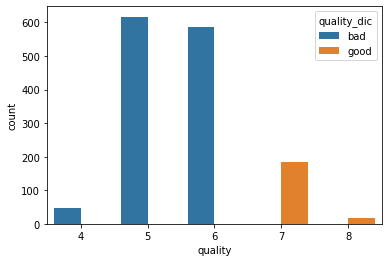

In [ ]:
sns.countplot(data=df_wine, x='quality', hue='quality_dic')

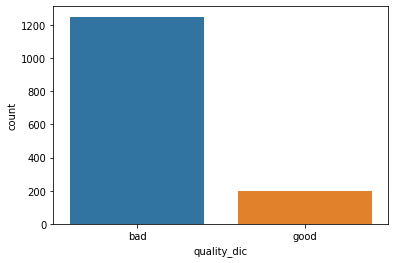

In [ ]:
sns.countplot(data=df_wine, x='quality_dic')

En esta sección procederemos a estudiar como se relacionan las variables de entrada con la variable de salida.

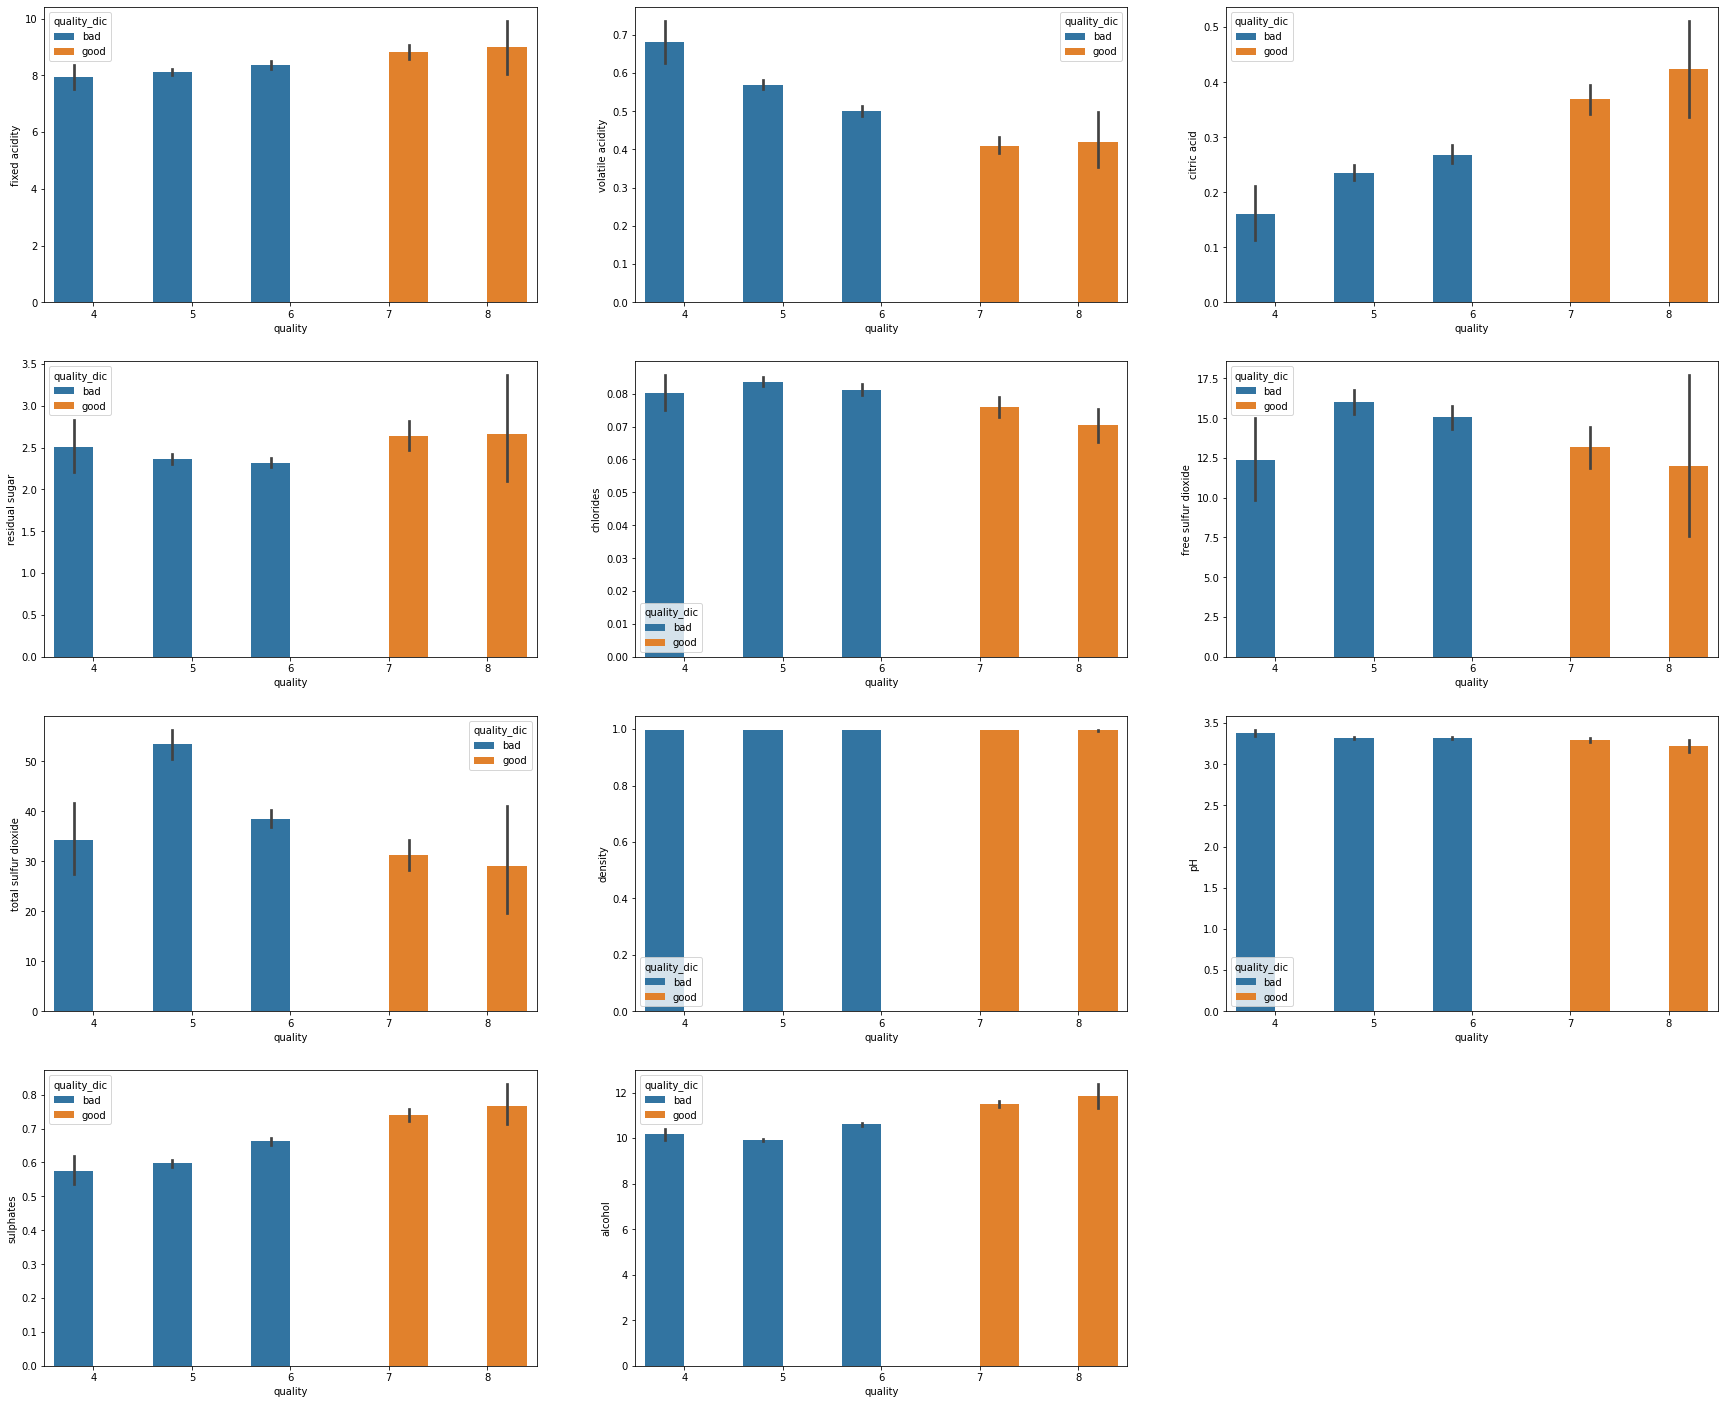

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(30,25))
sns.barplot(x ='quality', y ='fixed acidity', data = df_wine, hue='quality_dic', ax=ax[0,0])
sns.barplot(x ='quality', y ='volatile acidity', data = df_wine, hue='quality_dic', ax=ax[0,1])
sns.barplot(x ='quality', y ='citric acid', data = df_wine, hue='quality_dic', ax=ax[0,2])
sns.barplot(x ='quality', y ='residual sugar', data = df_wine, hue='quality_dic', ax=ax[1,0])
sns.barplot(x ='quality', y ='chlorides', data = df_wine, hue='quality_dic', ax=ax[1,1])
sns.barplot(x ='quality', y ='free sulfur dioxide', data = df_wine, hue='quality_dic', ax=ax[1,2])
sns.barplot(x ='quality', y ='total sulfur dioxide', data = df_wine, hue='quality_dic', ax=ax[2,0])
sns.barplot(x ='quality', y ='density', data = df_wine, hue='quality_dic', ax=ax[2,1])
sns.barplot(x ='quality', y ='pH', data = df_wine, hue='quality_dic', ax=ax[2,2])
sns.barplot(x ='quality', y ='sulphates', data = df_wine, hue='quality_dic', ax=ax[3,0])
sns.barplot(x ='quality', y ='alcohol', data = df_wine, hue='quality_dic', ax=ax[3,1])
ax[3,2].set_visible(False)

plt.show()


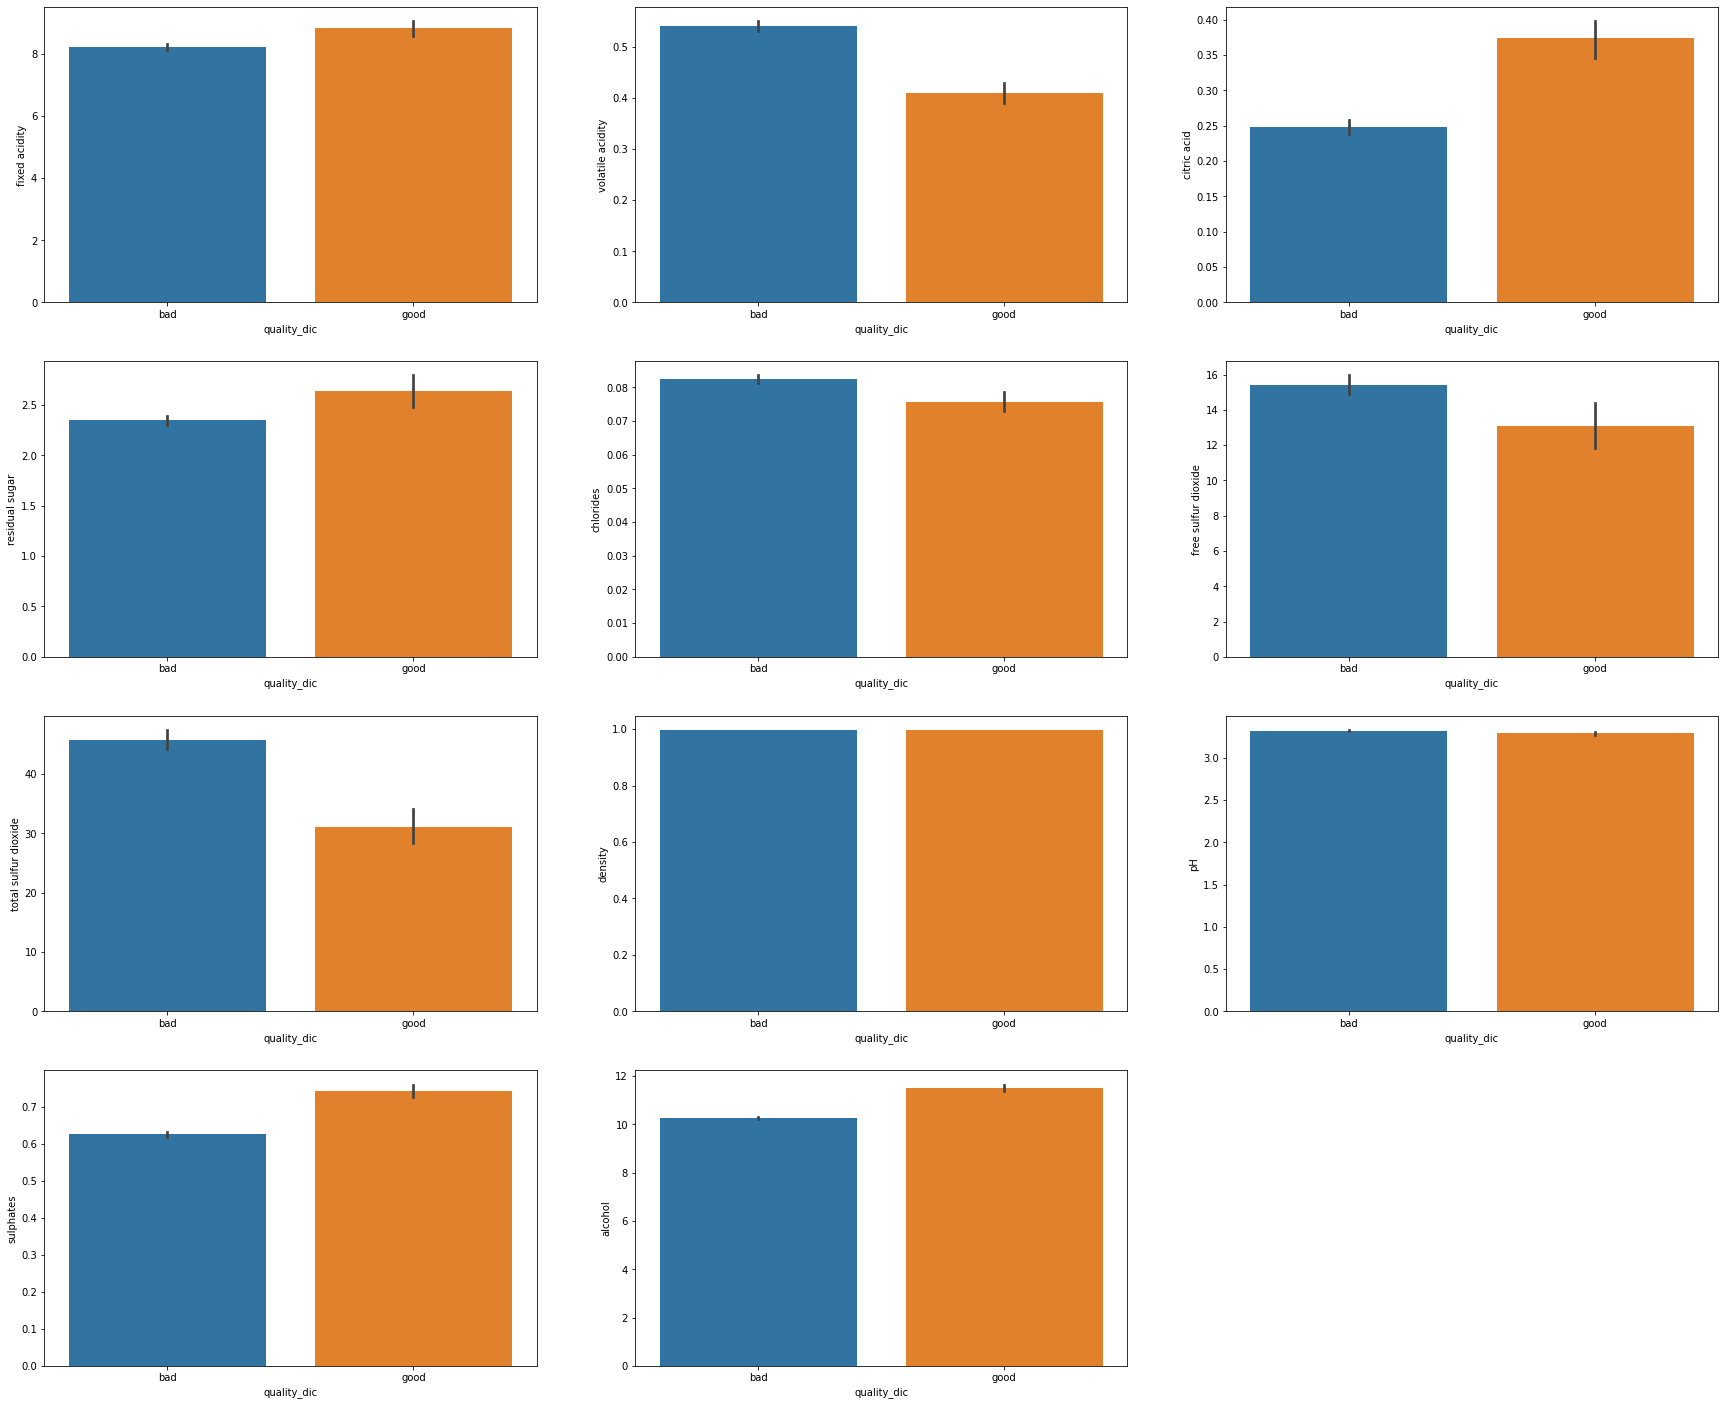

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(30,25))
sns.barplot(x ='quality_dic', y ='fixed acidity', data = df_wine, ax=ax[0,0])
sns.barplot(x ='quality_dic', y ='volatile acidity', data = df_wine, ax=ax[0,1])
sns.barplot(x ='quality_dic', y ='citric acid', data = df_wine, ax=ax[0,2])
sns.barplot(x ='quality_dic', y ='residual sugar', data = df_wine, ax=ax[1,0])
sns.barplot(x ='quality_dic', y ='chlorides', data = df_wine, ax=ax[1,1])
sns.barplot(x ='quality_dic', y ='free sulfur dioxide', data = df_wine, ax=ax[1,2])
sns.barplot(x ='quality_dic', y ='total sulfur dioxide', data = df_wine, ax=ax[2,0])
sns.barplot(x ='quality_dic', y ='density', data = df_wine, ax=ax[2,1])
sns.barplot(x ='quality_dic', y ='pH', data = df_wine, ax=ax[2,2])
sns.barplot(x ='quality_dic', y ='sulphates', data = df_wine, ax=ax[3,0])
sns.barplot(x ='quality_dic', y ='alcohol', data = df_wine, ax=ax[3,1])
ax[3,2].set_visible(False)

plt.show()

### Aplicación de pruebas estadísticas

#### Matriz de correlaciones

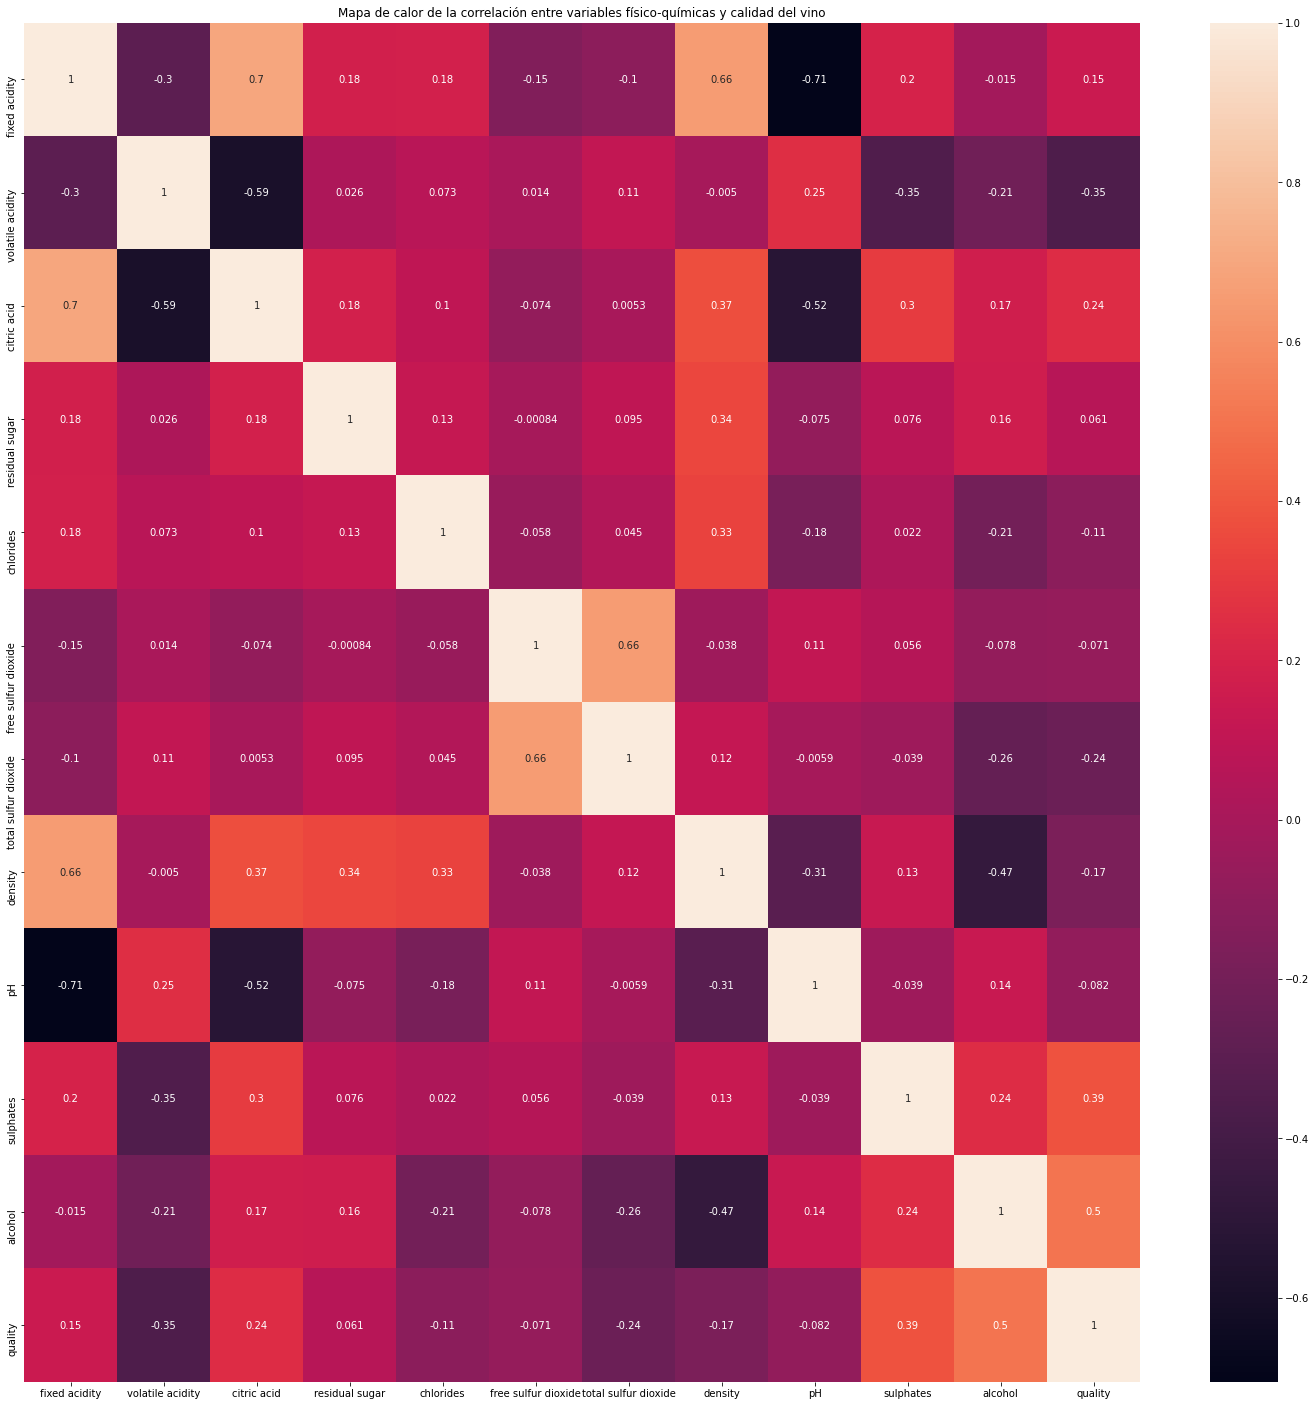

In [ ]:
corr_full = df_wine.iloc[:,:-1].corr()

plt.figure(figsize = (25, 25))
sns.heatmap(corr_full, annot = True)
plt.title("Mapa de calor de la correlación entre variables físico-químicas y calidad del vino")
plt.show()

In [ ]:
corr_full['quality'].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.501501
sulphates               0.386567
volatile acidity        0.353443
citric acid             0.243999
total sulfur dioxide    0.237745
density                 0.167568
fixed acidity           0.145163
chlorides               0.108787
pH                      0.082164
free sulfur dioxide     0.071202
residual sugar          0.061482
Name: quality, dtype: float64

#### Comparación de medias usando la variable de calidad dicotómica

In [ ]:
for col in df_wine.columns[:-2]:
  a=df_wine[col][df_wine['quality_dic']=='good']
  b=df_wine[col][df_wine['quality_dic']=='bad']
  stat, p = stats.levene(a, b)
  print('Test de levene para la variable',col,':\n',p)

Test de levene para la variable fixed acidity :
 0.004153448017235909
Test de levene para la variable volatile acidity :
 0.0027580942282154097
Test de levene para la variable citric acid :
 0.3461466672107366
Test de levene para la variable residual sugar :
 1.9634918737181094e-06
Test de levene para la variable chlorides :
 0.4447149667279404
Test de levene para la variable free sulfur dioxide :
 0.08852007840588247
Test de levene para la variable total sulfur dioxide :
 1.6811053516463866e-07
Test de levene para la variable density :
 0.00025309807165593135
Test de levene para la variable pH :
 0.9165873062368396
Test de levene para la variable sulphates :
 0.5995696107079331
Test de levene para la variable alcohol :
 0.30210881257905825


In [ ]:
columns_var=['citric acid', 'chlorides', 'free sulfur dioxide', 'pH', 'sulphates', 'alcohol']
columns_novar=['fixed acidity','volatile acidity','residual sugar','total sulfur dioxide','density']

In [ ]:
for col in columns_var:
  a=df_wine[col][df_wine['quality_dic']=='good']
  b=df_wine[col][df_wine['quality_dic']=='bad']
  stat, p = stats.ttest_ind(a,b,equal_var=True)
  print('Test de t de Student para la variable',col,':\n',p)

Test de t de Student para la variable citric acid :
 1.6491736739559251e-18
Test de t de Student para la variable chlorides :
 1.875862936235615e-05
Test de t de Student para la variable free sulfur dioxide :
 0.000985812934457707
Test de t de Student para la variable pH :
 0.0025664061191861607
Test de t de Student para la variable sulphates :
 8.759726091547653e-34
Test de t de Student para la variable alcohol :
 1.1393984848102585e-66


In [ ]:
for col in columns_novar:
  a=df_wine[col][df_wine['quality_dic']=='good']
  b=df_wine[col][df_wine['quality_dic']=='bad']
  stat, p = stats.ttest_ind(a,b,equal_var=False)
  print('Test de t de Student para la variable',col,':\n',p)

Test de t de Student para la variable fixed acidity :
 1.4257260388444856e-05
Test de t de Student para la variable volatile acidity :
 1.0267517575636705e-25
Test de t de Student para la variable residual sugar :
 0.0010976521828344153
Test de t de Student para la variable total sulfur dioxide :
 1.3527726673438106e-16
Test de t de Student para la variable density :
 4.874915523560399e-07


#### Construcción de los modelos



In [ ]:
from sklearn.model_selection import train_test_split

X=df_wine.drop(['quality', 'quality_dic'], axis=1)
y_reg=df_wine['quality']
y_clas=df_wine['quality_dic'].map({'good':1,'bad':0})

SEED = 2 # por reproducibilidad

#Stratified train/test split for visualization purposes
X_tr_reg, X_te_reg, y_tr_reg, y_te_reg = train_test_split(X, y_reg, test_size=0.2, stratify=y_reg, random_state=SEED)
X_tr_clas, X_te_clas, y_tr_clas, y_te_clas = train_test_split(X, y_clas, test_size=0.2, stratify=y_clas, random_state=SEED)

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

Reg_model= LinearRegression()
Clas_model = LogisticRegression(random_state = SEED)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler_reg = MinMaxScaler()
min_max_scaler_clas = MinMaxScaler()

X_tr_reg_minmax = min_max_scaler_reg.fit_transform(X_tr_reg)
X_te_reg_minmax = min_max_scaler_reg.transform(X_te_reg)

X_tr_clas_minmax = min_max_scaler_clas.fit_transform(X_tr_clas)
X_te_clas_minmax = min_max_scaler_clas.transform(X_te_clas)

Regresión lineal

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
Reg_model.fit(X_tr_reg_minmax,y_tr_reg)
y_pred_reg=Reg_model.predict(X_te_reg_minmax)

In [ ]:
print('Puntuación R2 para el conjunto de entrenamiento:', Reg_model.score(X_tr_reg_minmax,y_tr_reg))

Puntuación R2 para el conjunto de entrenamiento: 0.39346048157900454


In [ ]:
print('Puntuación R2 para el conjunto de prueba:', Reg_model.score(X_te_reg_minmax,y_te_reg))
print('MSE para el conjunto de entrenamiento:', mean_squared_error(y_te_reg,y_pred_reg))

Puntuación R2 para el conjunto de prueba: 0.31244638476846176
MSE para el conjunto de entrenamiento: 0.41423235840250605


In [ ]:
dif=(np.around(y_pred_reg,0)-np.array(y_te_reg))
print(dif)

[ 1.  0.  0. -1.  0.  0. -2.  0.  0.  1. -1.  0. -1.  0.  0.  0.  1. -1.
  0.  1. -1.  0.  1.  1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  2. -2.  0.  0.  0. -1.  0. -1.  0.  0.  1.  0. -1.  0.  0. -1.
  0.  0.  1.  0.  0. -1.  0.  1.  1. -1.  0. -1.  0. -1.  1.  0. -2.  0.
  0.  1.  0. -1.  1.  0.  1.  0.  1.  1.  0.  0. -1. -2.  0. -1.  0.  0.
  1. -1.  0. -1.  0.  0.  1.  0.  0. -1.  0.  1. -1.  0.  0. -1.  0.  0.
 -1.  0.  1. -1.  1.  0.  0.  0.  0.  1. -1. -1.  0. -1.  0.  0.  0. -1.
 -1.  0.  0.  1.  0.  0. -1.  1.  0.  0.  0. -1.  0. -1.  0.  0. -1. -1.
 -1. -1.  0. -1. -1.  0.  0.  0.  1.  1. -1.  0. -1.  1.  0.  0.  0.  0.
  0.  0.  0. -1.  0.  1.  0.  1.  0.  0.  0.  2.  0.  0.  0.  1.  0. -1.
 -1.  0.  0. -1.  0.  0.  1.  0.  0.  1.  1.  1.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0. -1. -1.  1.  0. -1.  0.  0.  0.  0.  0. -1.  1. -1.
  0.  1.  0.  0. -1.  1. -1. -1.  0.  0.  1.  0. -1. -1.  0. -1.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0. -1

In [ ]:
reg_corr=len(dif)-np.count_nonzero(dif)

print('El modelo ha logrado puntuar correctamente a',reg_corr,'vinos de',len(dif),'.')
print('Eso corresponde al',round((166/291*100),2),'% de vinos')


El modelo ha logrado puntuar correctamente a 166 vinos de 291 .
Eso corresponde al 57.04 % de vinos


#### Regresión logística

In [ ]:
Clas_model.fit(X_tr_clas_minmax, y_tr_clas)
y_pred_clas = Clas_model.predict(X_te_clas_minmax)

              precision    recall  f1-score   support

           0       0.88      0.96      0.91       251
           1       0.35      0.15      0.21        40

    accuracy                           0.85       291
   macro avg       0.61      0.55      0.56       291
weighted avg       0.80      0.85      0.82       291



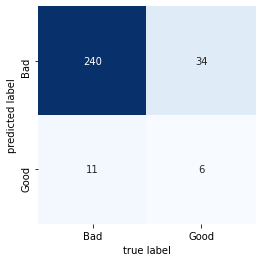

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

mat=confusion_matrix(y_te_clas, y_pred_clas)

sns.heatmap(mat.T, cmap=("Blues"), square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Bad','Good'],
            yticklabels=['Bad','Good'])
plt.xlabel('true label')
plt.ylabel('predicted label');
print(classification_report(y_te_clas, y_pred_clas))